# Solothurn

#### PDF einlesen
* PDF einlesen, concatenaten, index neu setzen
* über einen csv-export manuell verschobene Zellen korrigieren, wieder einlesen
* zugelassene Leistungen zu 1, leere Felder zu 0 umwandeln.

#### Daten bereinigen
Als Zwischenschritt habe ich HSM-Einträge vom CSV-File 'Solothurn_x.csv' manuell der richtigen Zeile zugeordnet. Hier arbeite ich weiter mit dem File 'Solothurn_hsm.csv'.
* x und NaN werte zu 1 und 0 umwandeln
* Leistungsgruppen von Kürzel trennen
* abspeichern zu Solothurn_0.csv
* erste Plots

In [25]:
#import stuff
import pandas as pd
import camelot.io as camelot
import re

In [26]:
path = 'Listen/Solothurn.pdf'
tables = camelot.read_pdf(path, pages = 'all', flavor='lattice')

In [27]:
# alle Seiten zusammenhängen

df = pd.DataFrame()
headers = ['Leistungsbereiche', 'Leistungsgruppen','Pallas Kliniken AG', 'Privatklinik Obach', 'Solothurner Spitäler AG', 
            'Engeriedspital (Lindenhofgruppe)', 'Hirslanden Klinik Aarau', 
            'Inselspital Bern (Insel Gruppe AG)', 'Kantonsspital Aarau', 'Kantonsspital Baselland', 
            'Klinik Beau-Site (Hirslanden Bern AG)', 'Lindenhofspital (Lindenhofgruppe)', 
            'Salem-Spital (Hirslanden Bern AG)', 'St. Claraspital AG', 'Universitäts-Kinderspital beider Basel', 
            'Universitätsspital Basel']

for page in range(2):
    temp = tables[page].df
    temp = temp[1:]
    temp.columns = headers
    frames = [df, temp]
    df = pd.concat(frames)

df = df.reset_index()
del df['index'] 

In [28]:
df.head(2)

,Leistungsbereiche,Leistungsgruppen,Pallas Kliniken AG,Privatklinik Obach,Solothurner Spitäler AG,Engeriedspital (Lindenhofgruppe),Hirslanden Klinik Aarau,Inselspital Bern (Insel Gruppe AG),Kantonsspital Aarau,Kantonsspital Baselland,Klinik Beau-Site (Hirslanden Bern AG),Lindenhofspital (Lindenhofgruppe),Salem-Spital (Hirslanden Bern AG),St. Claraspital AG,Universitäts-Kinderspital beider Basel,Universitätsspital Basel
0,Basispaket,BP Basispaket Chirurgie und Innere Medizin,,,x,,,,,x,,,,,x,
1,,BPE Basispaket für elektive Leistungserbringer,x,x,,,,,,,,,,,,


In [29]:
df.to_csv('exports/solothurn_x.csv')

## Daten bereinigen

Soweit so schön, allerdings wurden HSM-Einträge (Hochspezialisierte Medizin) nur teilweise der richtigen Spalte zugeordnet. Ich überprüfe von Hand und lese das neue CSV wieder ein: 

In [31]:
df_hsm = pd.read_csv('exports/solothurn_hsm.csv')
df_hsm.head(2)

,Leistungsbereiche,Leistungsgruppen,Pallas Kliniken AG,Privatklinik Obach,Solothurner Spitäler AG,Engeriedspital (Lindenhofgruppe),Hirslanden Klinik Aarau,Inselspital Bern (Insel Gruppe AG),Kantonsspital Aarau,Kantonsspital Baselland,Klinik Beau-Site (Hirslanden Bern AG),Lindenhofspital (Lindenhofgruppe),Salem-Spital (Hirslanden Bern AG),St. Claraspital AG,Universitäts-Kinderspital beider Basel,Universitätsspital Basel
0,Basispaket,BP Basispaket Chirurgie und Innere Medizin,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN
1,NaN,BPE Basispaket für elektive Leistungserbringer,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Befristete Werte zähle ich als zugelassene Zelle, ebenso HSM, dh Leistungen hochspezialisierter Medizin.

def search_x(cell):
    if cell == 'x' or cell == 'X' or cell == 'b' or cell == 'HSM':
        return 1
    elif pd.isnull(cell) or cell =='':
        return 0
    else:
        return cell

In [33]:
columns = df_hsm.columns.tolist()[2:]

for column in columns:
    df_hsm[column] = df_hsm[column].apply(search_x)
    
df_hsm

,Leistungsbereiche,Leistungsgruppen,Pallas Kliniken AG,Privatklinik Obach,Solothurner Spitäler AG,Engeriedspital (Lindenhofgruppe),Hirslanden Klinik Aarau,Inselspital Bern (Insel Gruppe AG),Kantonsspital Aarau,Kantonsspital Baselland,Klinik Beau-Site (Hirslanden Bern AG),Lindenhofspital (Lindenhofgruppe),Salem-Spital (Hirslanden Bern AG),St. Claraspital AG,Universitäts-Kinderspital beider Basel,Universitätsspital Basel
0,Basispaket,BP Basispaket Chirurgie und Innere Medizin,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,NaN,BPE Basispaket für elektive Leistungserbringer,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,Dermatologie,DER1 Dermatologie (inkl. Geschlechtskrankheiten),1,0,1,0,0,1,0,1,0,0,0,0,1,0
3,NaN,DER1.1 Dermatologische Onkologie,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,NaN,DER1.2 Schwere Hauterkrankungen,0,0,0,0,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,NaN,KINC Kinderchirurgie,0,0,0,0,0,1,1,0,0,0,0,0,1,0
130,NaN,KINB Basis-Kinderchirurgie,0,0,1,0,0,1,1,0,0,0,0,0,1,0
131,NaN,GER Akutgeriatrie Kompetenzzentrum,0,0,1,0,0,0,0,1,0,0,0,0,0,0
132,NaN,PAL Palliative Care Kompetenzzentrum,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [34]:
# Kontrollieren dass alle Werte erfasst wurden
df_hsm.dtypes

Leistungsbereiche                         object
Leistungsgruppen                          object
Pallas Kliniken AG                         int64
Privatklinik Obach                         int64
Solothurner Spitäler AG                    int64
Engeriedspital (Lindenhofgruppe)           int64
Hirslanden Klinik Aarau                    int64
Inselspital Bern (Insel Gruppe AG)         int64
Kantonsspital Aarau                        int64
Kantonsspital Baselland                    int64
Klinik Beau-Site (Hirslanden Bern AG)      int64
Lindenhofspital (Lindenhofgruppe)          int64
Salem-Spital (Hirslanden Bern AG)          int64
St. Claraspital AG                         int64
Universitäts-Kinderspital beider Basel     int64
Universitätsspital Basel                   int64
dtype: object

In [36]:
#df.info()

### Leistungsspalte schön

In [37]:
# Um anschliessend Leistungsgruppen zu harmonisieren werden sie hier von den Kürzeln getrennt

df_leistungsgruppe = df_hsm.copy()

In [38]:
searchfor = (r'(\S* )(.*)')

df_leistungsgruppe[['Kürzel','Leistungsgruppe']] = df_leistungsgruppe['Leistungsgruppen'].str.extract(searchfor, expand=True)
df_leistungsgruppe = df_leistungsgruppe.drop('Leistungsgruppen', axis=True)
# header neu ordnen
df_leistungsgruppe = df_leistungsgruppe[['Leistungsbereiche','Kürzel','Leistungsgruppe','Pallas Kliniken AG', 'Privatklinik Obach', 'Solothurner Spitäler AG', 
            'Engeriedspital (Lindenhofgruppe)', 'Hirslanden Klinik Aarau', 
            'Inselspital Bern (Insel Gruppe AG)', 'Kantonsspital Aarau', 'Kantonsspital Baselland', 
            'Klinik Beau-Site (Hirslanden Bern AG)', 'Lindenhofspital (Lindenhofgruppe)', 
            'Salem-Spital (Hirslanden Bern AG)', 'St. Claraspital AG', 'Universitäts-Kinderspital beider Basel', 
            'Universitätsspital Basel']]
df_leistungsgruppe.head(2)

,Leistungsbereiche,Kürzel,Leistungsgruppe,Pallas Kliniken AG,Privatklinik Obach,Solothurner Spitäler AG,Engeriedspital (Lindenhofgruppe),Hirslanden Klinik Aarau,Inselspital Bern (Insel Gruppe AG),Kantonsspital Aarau,Kantonsspital Baselland,Klinik Beau-Site (Hirslanden Bern AG),Lindenhofspital (Lindenhofgruppe),Salem-Spital (Hirslanden Bern AG),St. Claraspital AG,Universitäts-Kinderspital beider Basel,Universitätsspital Basel
0,Basispaket,BP,Basispaket Chirurgie und Innere Medizin,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,NaN,BPE,Basispaket für elektive Leistungserbringer,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
# df exportieren

df_leistungsgruppe.to_csv('exports/solothurn_0.csv', index=False)

Anschliessend werden die Leistungsgruppen manuell mit Excel harmonisiert, weiter geht es mit 'Solothurn_1.csv'.

### Daten angucken

In [42]:
spital_summe = df_hsm.sum().sort_values(ascending=False)

spital_summe

Universitäts-Kinderspital beider Basel    106
Kantonsspital Baselland                    89
Solothurner Spitäler AG                    86
Inselspital Bern (Insel Gruppe AG)         62
Universitätsspital Basel                   55
Kantonsspital Aarau                        31
Privatklinik Obach                         24
Pallas Kliniken AG                         19
Klinik Beau-Site (Hirslanden Bern AG)       7
St. Claraspital AG                          6
Lindenhofspital (Lindenhofgruppe)           2
Hirslanden Klinik Aarau                     2
Salem-Spital (Hirslanden Bern AG)           1
Engeriedspital (Lindenhofgruppe)            1
dtype: int64

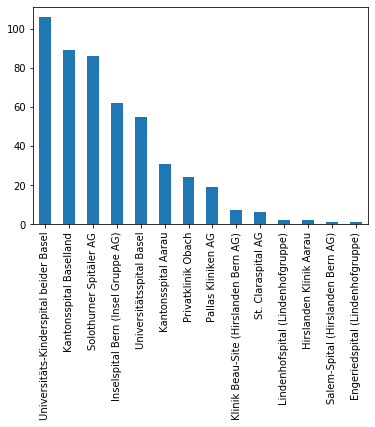

In [43]:
spital_summe.plot(kind='bar')